**KELOMPOK 8**
- Murni Lestari Rahmi (2106035)
- M. Zilhan Salman Ramadhan (2106018)

**Advertising and Sales**.
Data contains:
- TV promotion budget (in million)
- Radio promotion budget (in million)
- Social Media promotion budget (in million)
- Influencer: Whether the promotion collaborate with Mega, Macro, Nano, Micro influencer
- Sales (in million)

>
**Hipotesis:** "Iklan mempengaruhi Penjualan"

>
**Pertanyaan:**
- Iklan apa yg paling besar mempengaruhi penjualan?
- Berapa prediksi penjualan jika budget iklan TV=230, Radio=37, Social Media=69 ?
- Berapa prediksi penjualan jika budget iklan TV=23, Radio=37, Social Media=69 ?

>
**TAHAPAN MACHINE LEARNING:**

**1. Pengumpulan Data**
>
Mengambil dataset mentah di situs kaggle.com:
https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data

Dataset tersebut dirapikan dan dipilah kembali. Berikut link dataset yang telah diolah: https://github.com/murnilestarirahmi/UAS-Kecerdasan-Buatan-Kelompok-8/blob/main/Advertising%20and%20Sales.csv

**2. Persiapan Data**

In [1]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Nama data frame adalah df yang berisi data dari Advertising and Sales.csv
df = pd.read_csv('Advertising and Sales.csv')

In [3]:
# Melihat 10 baris teratas dari data
# Independent variable(x) adalah Sales
# Depent variables(y) adalah TV, Radio dan Social Media
df.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,NaN,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
5,29.0,9.614382,1.027163,Mega,105.889148
6,55.0,24.893811,4.273602,Micro,198.679825
7,31.0,17.355042,2.289855,Nano,108.733932
8,76.0,24.648898,7.130116,Macro,270.189400
9,13.0,0.431128,2.229423,Mega,48.280582


In [4]:
# Kolom Influencer hanya memuat kategori influencer
# Jadi kita menggunakan kolom TV, Radio, Social Media dan Sales saja
df = pd.read_csv('Advertising and Sales.csv', usecols=['TV', 'Radio', 'Social Media', 'Sales'])
df.head()

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,NaN,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


In [5]:
# Mengetahui jumlah kolom dan baris dari data
# Data kita mempunyai 4 kolom dengan 200 baris
df.shape

(200, 4)

In [6]:
# Mengetahui informasi data kita dari jumlah data, tipe data , memory yang digunakan dll
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            199 non-null    float64
 1   Radio         200 non-null    float64
 2   Social Media  200 non-null    float64
 3   Sales         200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
# Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll
df.describe()

,TV,Radio,Social Media,Sales
count,199.000000,200.000000,200.000000,200.000000
mean,54.959799,19.026675,3.455329,194.708553
std,26.462445,10.438489,2.199620,94.866019
min,10.000000,0.226326,0.003177,32.566825
25%,32.000000,10.267054,1.648859,112.298505
50%,51.000000,18.776525,3.219552,179.727144
75%,77.000000,26.026959,4.930449,274.147058
max,100.000000,47.116293,9.997472,356.582143


In [8]:
# Mencari dan menangani missing value
# Terdapat 1 missing value pada kolom TV
df.isnull().sum()

TV              1
Radio           0
Social Media    0
Sales           0
dtype: int64

In [9]:
# Mengganti missing values pada kolom TV dengan nilai baru
df['TV'].fillna(13.9, inplace=True)

In [10]:
# Cek kembali jumlah missing values pada kolom TV
# Ternyata sudah tidak ada lagi missing values
print(df['TV'].isna().sum())

0


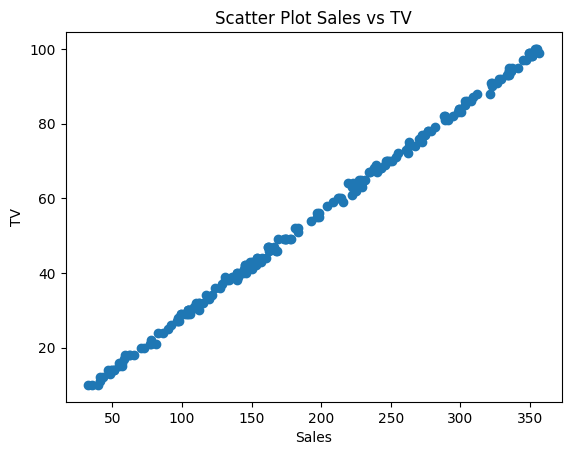

In [11]:
# Bivariate analysis Sales and TV
# Menggunakan scatter plot
plt.scatter(df['Sales'], df['TV'])
plt.xlabel('Sales')
plt.ylabel('TV')
plt.title('Scatter Plot Sales vs TV')
plt.show()

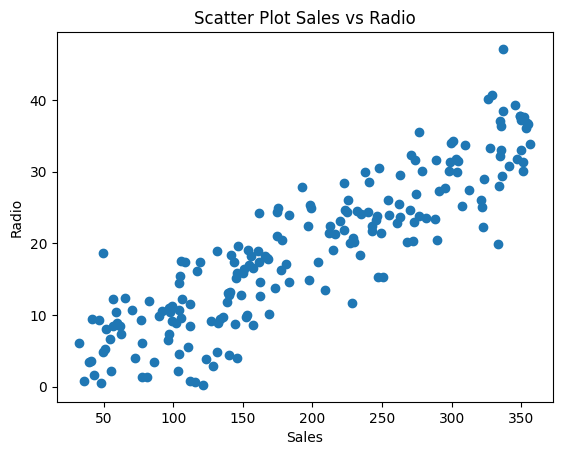

In [12]:
# Bivariate analysis Sales and Radio
# Menggunakan scatter plot
plt.scatter(df['Sales'], df['Radio'])
plt.xlabel('Sales')
plt.ylabel('Radio')
plt.title('Scatter Plot Sales vs Radio')
plt.show()

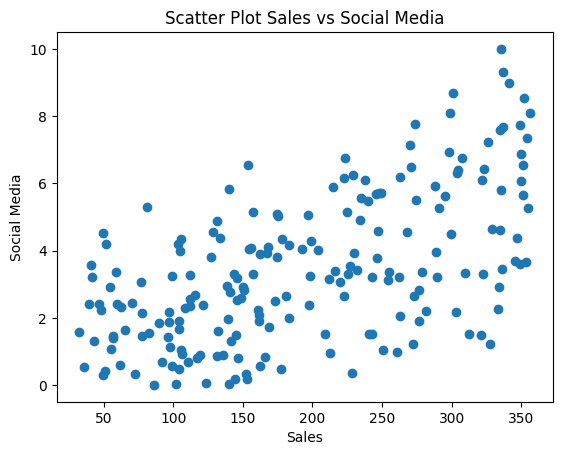

In [13]:
# Bivariate analysis Sales and Social Media
# Menggunakan scatter plot
plt.scatter(df['Sales'], df['Social Media'])
plt.xlabel('Sales')
plt.ylabel('Social Media')
plt.title('Scatter Plot Sales vs Social Media')
plt.show()

In [14]:
# Mengetahui nilai korelasi antar variabel
# Nilai korelasi Sales dan TV adalah 0.99
# Nilai korelasi Sales dan Radio adalah 0.89
# Nilai korelasi Sales dan Social Media adalah 0.59
df.corr()

,TV,Radio,Social Media,Sales
TV,1.000000,0.890061,0.589292,0.999550
Radio,0.890061,1.000000,0.646888,0.890127
Social Media,0.589292,0.646888,1.000000,0.590194
Sales,0.999550,0.890127,0.590194,1.000000


In [15]:
# Mengurutkan hasil korelasi
correlation = df.corr()
print(correlation["Sales"].sort_values(ascending=False))

Sales           1.000000
TV              0.999550
Radio           0.890127
Social Media    0.590194
Name: Sales, dtype: float64


**3. Modelling**

In [16]:
# Recall data
df.head()

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.9,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


In [17]:
# Pertama, buat variabel x dan y
x = np.array(df.drop(["Sales"], 1))
y = np.array(df["Sales"])

<ipython-input-17-62953b07dc3a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop(["Sales"], 1))


In [18]:
# Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
# Ketiga, kita buat object linear regresi
lin_reg = LinearRegression()

**4. Training**

In [20]:
# Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression()

In [21]:
# Kelima, cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 3.57035714  0.00790892 -0.01293931]
-0.9945816317719505


In [22]:
# Keenam, kita cari tahu accuracy score dari model kita
# menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.999143480397795

In [23]:
# Ketujuh, visualisasi aktual vs prediksi menggunakan data testing
# Garis merupakan garis regresi dari persamaan yang kita dapat tadi
import plotly.express as px
import plotly.graph_objects as go
figure = px.scatter(data_frame=df, x="Sales", y="TV", trendline="ols")
figure.show()

In [24]:
figure = px.scatter(data_frame=df, x="Sales", y="Radio", trendline="ols")
figure.show()

In [25]:
figure = px.scatter(data_frame=df, x="Sales", y="Social Media", trendline="ols")
figure.show()

- pada hasil visualisasi diatas, dapat kita lihat hubungan titik-titik dengan garis regresi. Dimana semakin titik-titik tersebut menempel ke garis maka semakin baik.

**5. Evaluation**

In [26]:
# Lakukan prediksi
# Features = TV, Radio, Social Media
# Misal budget iklan TV=230, iklan Radio=37, iklan Social Media=69
# Berapa prediksi jumlah penjualan (Sales)?
features = np.array([[230, 37, 69]])
print("Sales =", lin_reg.predict(features))

Sales = [819.58737765]


In [27]:
# Misal budget iklan TV=23, iklan Radio=37, iklan Social Media=69
# Berapa prediksi jumlah penjualan (Sales)?
features = np.array([[23, 37, 69]])
print("Sales =", lin_reg.predict(features))

Sales = [80.52345025]


- dari hasil prediksi diatas dapat disimpulkan bahwa iklan yang paling berpengaruh terhadap penjualan adalah iklan TV.
- dibuktikan dengan saat budget iklan TV lebih besar dari budget iklan Radio dan Social media, terjadi keuntungan pada penjualan.
- namun saat budget budget iklan TV lebih kecil dari budget iklan Radio dan Social media, maka terjadi kerugian pada penjualan.